# Business Understanding

Karamoja is the most food-insecure region of Uganda which is mainly due to low crop productivity level caused by intense droughts as well as pest and disease outbreak.

Several NGO's provide technical and farm inputs to farmers experiencing extremely low yield which they often need to rely  on some very local sources of information to prioritize their activities.

Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.


## Objectives

The agri-tech team has asked us to develop an interactive visualization tool of the results for this first crop season which will be used as the first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.

# Data Understanding

The datasets that we wil be working with are :

  - **Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv**
  - **Uganda_Karamoja_District_Crop_Yield_Population.csv**

In order to understand the datasets that we are working with :      
   - Load in the datasets
   - Preview the datasets
   

In [2]:
# Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Datasets
subcounty = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")
district = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')

In [4]:
subcounty.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [5]:
district.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


# Data Preparation

We are now preparing the data for modeling and analysis which will require a few processes :

 - We will need to clean the datasets ;

  - Filter out any irrelevant attributes
  - Handle missing values by either dropping or renaming
  - Cleaning of inconsistent values

## Subcounty Dataset

In [6]:
subcounty.isnull().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


The subcounty dataset does not hold any missing values.

In [7]:
# Renaming columns for easy reading and interpretation
subcounty = subcounty.rename(columns={
    'POP':'Population',
    'S_Yield_Ha':'Sorghum Yield per Hectare',
    'M_Yield_Ha': 'Maize Yield Per Hectare',
    'Crop_Area_Ha':'Total Crop Area',
    'S_Area_Ha':'Sorghum Area per Hectare',
    'M_Area_Ha':'Maize Area per Hectare',
    'S_Prod_Tot': 'Sorghum Production per Hectare',
    'M_Prod_Tot': 'Maize Production per Hectare'
    })
subcounty.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,Population,Area,Karamoja,Sorghum Yield per Hectare,Maize Yield Per Hectare,Total Crop Area,Sorghum Area per Hectare,Maize Area per Hectare,Sorghum Production per Hectare,Maize Production per Hectare
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [8]:
# Creating a new column (Yield Per Capita)
subcounty['Yield Per Capita'] = (subcounty['Sorghum Production per Hectare'] + subcounty['Maize Production per Hectare']) / subcounty['Population']
subcounty.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,Population,Area,Karamoja,Sorghum Yield per Hectare,Maize Yield Per Hectare,Total Crop Area,Sorghum Area per Hectare,Maize Area per Hectare,Sorghum Production per Hectare,Maize Production per Hectare,Yield Per Capita
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,167.003924
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,105.010249
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,20.864872
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,50.410512
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,60.902666


## District Dataset

In [9]:
district.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


The District Dataset also does not contain any null values

In [10]:
# Renaming columns for easy reading and interpretation
district = district.rename(columns={
    'POP':'Population',
    'S_Yield_Ha':'Sorghum Yield per Hectare',
    'M_Yield_Ha': 'Maize Yield Per Hectare',
    'Crop_Area_Ha':'Total Crop Area',
    'S_Area_Ha':'Sorghum Area per Hectare',
    'M_Area_Ha':'Maize Area per Hectare',
    'S_Prod_Tot': 'Sorghum Production per Hectare',
    'M_Prod_Tot': 'Maize Production per Hectare',
    })
district.head()

,OBJECTID,NAME,Population,Area,Sorghum Yield per Hectare,Maize Yield Per Hectare,Total Crop Area,Sorghum Area per Hectare,Maize Area per Hectare,Sorghum Production per Hectare,Maize Production per Hectare
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [11]:
# Creating a new column (Yield per Capita)
district['Yield Per Capita'] = (district['Sorghum Production per Hectare'] + district['Maize Production per Hectare']) / district['Population']
district.head()

,OBJECTID,NAME,Population,Area,Sorghum Yield per Hectare,Maize Yield Per Hectare,Total Crop Area,Sorghum Area per Hectare,Maize Area per Hectare,Sorghum Production per Hectare,Maize Production per Hectare,Yield Per Capita
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,37.551286
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,40.820415
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,20.284524
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,76.668486
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,8.054174


With the datasets cleaned, we now need to export the cleaned dataset for visualisations on Tableau

In [12]:
# Exporting the cleaned datasets
subcounty.to_csv("Cleaned_Subcounty_Data.csv", index=False)
district.to_csv("Cleaned_District_Data.csv", index=False)

# Visualizations

With the datasets cleaned and columns renamed, they are now ready for visualizations.

This is to help us in giving the NGO's and DDI recomendations and conclusions that are backed up by our visualisations.

## Sorghum vs Maize Yield Per Hectare

/tmp/ipython-input-3570615335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield_Ha', data=melted, palette=['#2ecc71','#e67e22'])


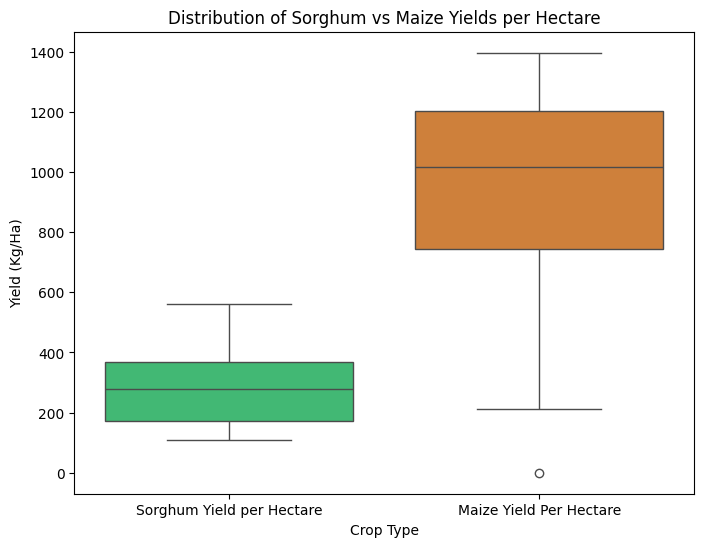

In [13]:
# Select relevant columns
yield_data = subcounty[['Sorghum Yield per Hectare', 'Maize Yield Per Hectare']]

# Melt for easier plotting
melted = yield_data.melt(var_name='Crop', value_name='Yield_Ha')

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Crop', y='Yield_Ha', data=melted, palette=['#2ecc71','#e67e22'])
plt.title("Distribution of Sorghum vs Maize Yields per Hectare")
plt.ylabel("Yield (Kg/Ha)")
plt.xlabel("Crop Type")
plt.show()

Maize is wide spread and has many outliers but sorghum is more stable.

## Highest Yield per Capita by Districts

/tmp/ipython-input-18423855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Yield Per Capita", y="NAME", data=low_yield, palette="Reds_r")


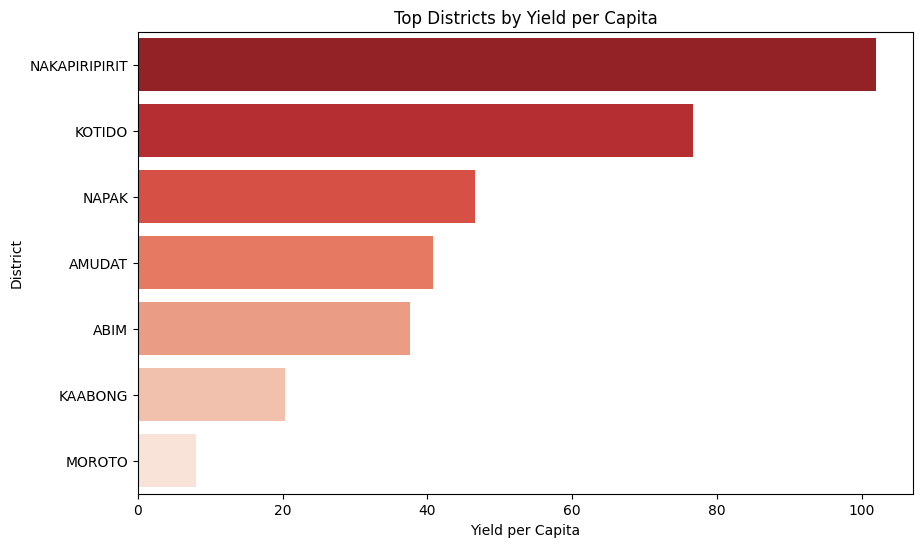

In [14]:
# Sort by lowest yield per capita
low_yield = district.sort_values("Yield Per Capita", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Yield Per Capita", y="NAME", data=low_yield, palette="Reds_r")
plt.title("Top Districts by Yield per Capita")
plt.xlabel("Yield per Capita")
plt.ylabel("District")
plt.show()

Certain districts (e.g., Moroto, Kaabong) show very low yield per capita while Kotido and Nakapiripirit show high yield per capita`

## Crop Area vs Production

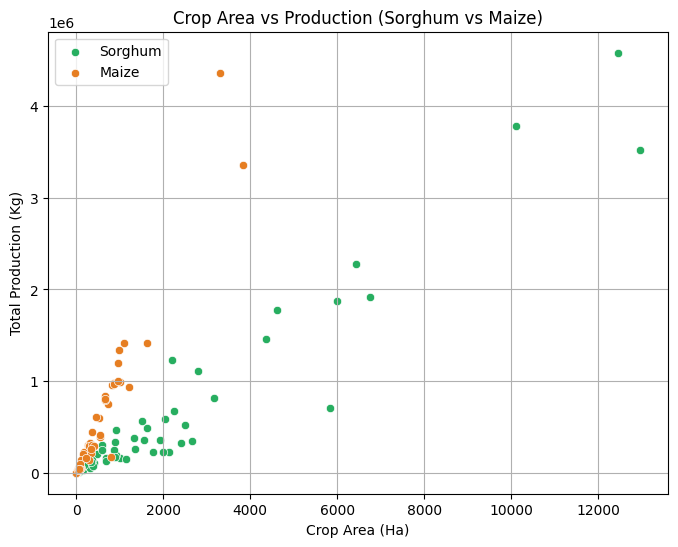

In [15]:
# Scatterplot: Sorghum
plt.figure(figsize=(8,6))
sns.scatterplot(x="Sorghum Area per Hectare", y="Sorghum Production per Hectare", data=subcounty, color="#27ae60", label="Sorghum")

# Scatterplot: Maize
sns.scatterplot(x="Maize Area per Hectare", y="Maize Production per Hectare", data=subcounty, color="#e67e22", label="Maize")

plt.title("Crop Area vs Production (Sorghum vs Maize)")
plt.xlabel("Crop Area (Ha)")
plt.ylabel("Total Production (Kg)")
plt.legend()
plt.grid()
plt.show()

From the plot above we can see that for maize, crop area does not correspond to the total production but for sorghum; the more the crop area the higher the total production.

## Sorghum vs maize comparison (District)

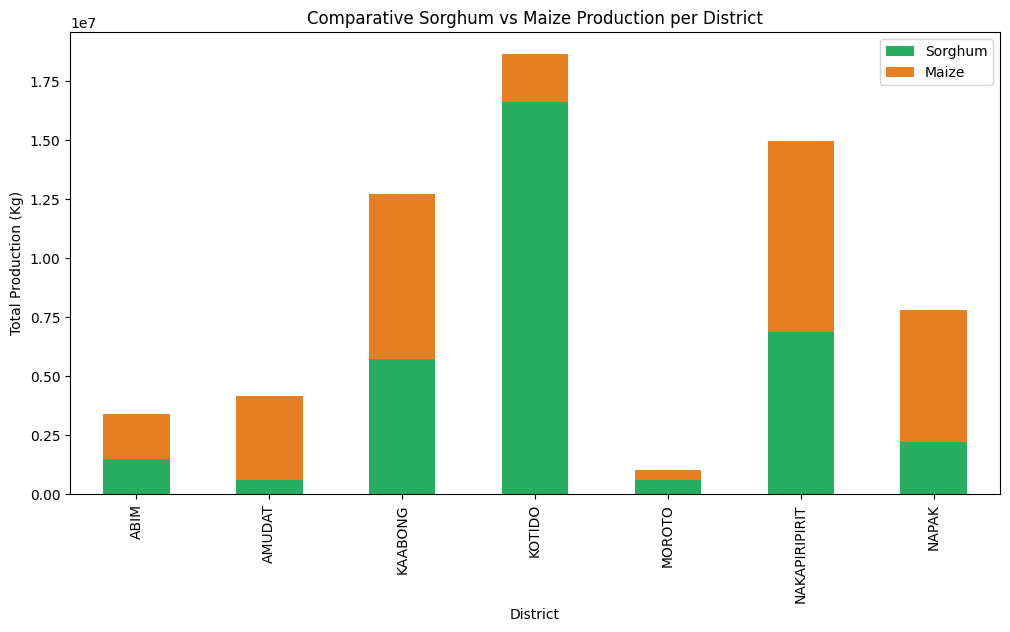

In [17]:
# Prepare data
prod_df = district[["NAME", "Sorghum Production per Hectare", "Maize Production per Hectare"]].set_index("NAME")

# Plot stacked bar
prod_df.plot(kind="bar", stacked=True, figsize=(12,6), color=["#27ae60", "#e67e22"])
plt.title("Comparative Sorghum vs Maize Production per District")
plt.ylabel("Total Production (Kg)")
plt.xlabel("District")
plt.legend(["Sorghum", "Maize"])
plt.show()

We can see from the chart above that no district heavily depends on maize other than Napak and Amudat rather it is almost equal or sorghum is heavily depended.

# Recommendations

By the use of visualisations done above, we can now give the NGO and DDI recommendations that have been backed by the data they provided to us.

These recommendations are :     
   1. NGOs should scale maize as a more predictable food source since it is more stable.
   2. They should invest in drought and pest-resistant varieties of sorghum as it has no outliers and has a tight spread range of productivity.
   3. Districts with high yield per capita ( Nakapiripirit and Kotido ) could serve as redistribution hubs / surplus zones due to their high yield.
   4. Districts / Subcounties should increase crop area for sorghum as it directly corresponds to the production of the crop.
   5. If the NGOs are aiming for high crop production, then they should prioritize sorghum, as districts with high production do so or aim for an even 50/ 50 together with maize.